# Unsupervised Learning - Stock Data

### Problem Statement

Trade&Ahead is a financial consultancy firm that provides its customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

## Data Description 

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock
market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock is currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [85]:
data = pd.read_csv("datasets/stock_data.csv")

In [86]:
data.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [87]:
data.shape

(340, 15)

### Observations

- There are 340 observations across 15 columns

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Observations 

- 'TIcker Symbol' ,'Security','GICS Sector' , 'GICS Sub Industry' are of type 'object'
- 'Current Price', 'Price Change','Volatility','Earnings Per Share', 'Estimated Shares Outstanding',' P/E ratio','P/B ratio' are of type 'float64'
- 'ROE','Cash Ratio','Net Cash Flow','Net Income' are of type 'int64'

In [89]:
data.describe(include='all')

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340,340,340,340,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
unique,340,340,11,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AAL,American Airlines Group,Industrials,Oil & Gas Exploration & Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,53,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,NaN,NaN,NaN,NaN,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,NaN,NaN,NaN,NaN,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,NaN,NaN,NaN,NaN,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,NaN,NaN,NaN,NaN,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,NaN,NaN,NaN,NaN,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066


### Obsservations 

1. 'Ticker Symbol' & 'Security' have all the unique values
2. 'GICS Sector' have 11 unique values with 53 frequency of 'Inustrials' itself
3. 'GICS Sub Sector' have 104 unique values with 16 frequency of 'Oil & Gas Exploration & Production'
4. The mean 'Current Price' is 80.86
5. The mean 'Price Change' is 4.0681 and std div 12.00
6. The Volatility looks pretty normalized with max value of 4.58 and min of 0.733
7. The mean is 39.59 and median 15.00 for 'ROE' suggesting presence of outliers
8. The mean is 70.02 and median is 47.00 for 'Cash Ratio' suggesting presence of outliers
9. 'Cash Flow', 'Estimated Shares Outstanding' and 'Net Income' has very large values and needs to be scaled before using it for any algorithm.
10. 'Earnings per share' has mean of 2.77 and median of 2.89 suggesting no outliers
11. 'P/E Ratio' has big difference between mean and median suggesting there are outliers
12. 'P/B Ratio' has very small difference between mean and median suggesting no outliers   

### EDA Univariate Analysis

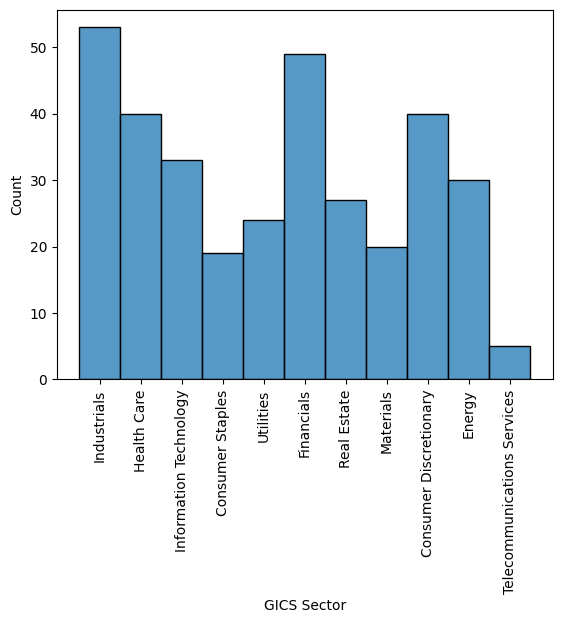

In [90]:
#analyzing GICS Sector using histplot
sns.histplot(data,x='GICS Sector')
plt.xticks(rotation = 90);

### Observations

- Industrials is the sector whose frequency is the highest the data set
- Telecommunications Services is the sector whose frequency is the lowest in the dataset

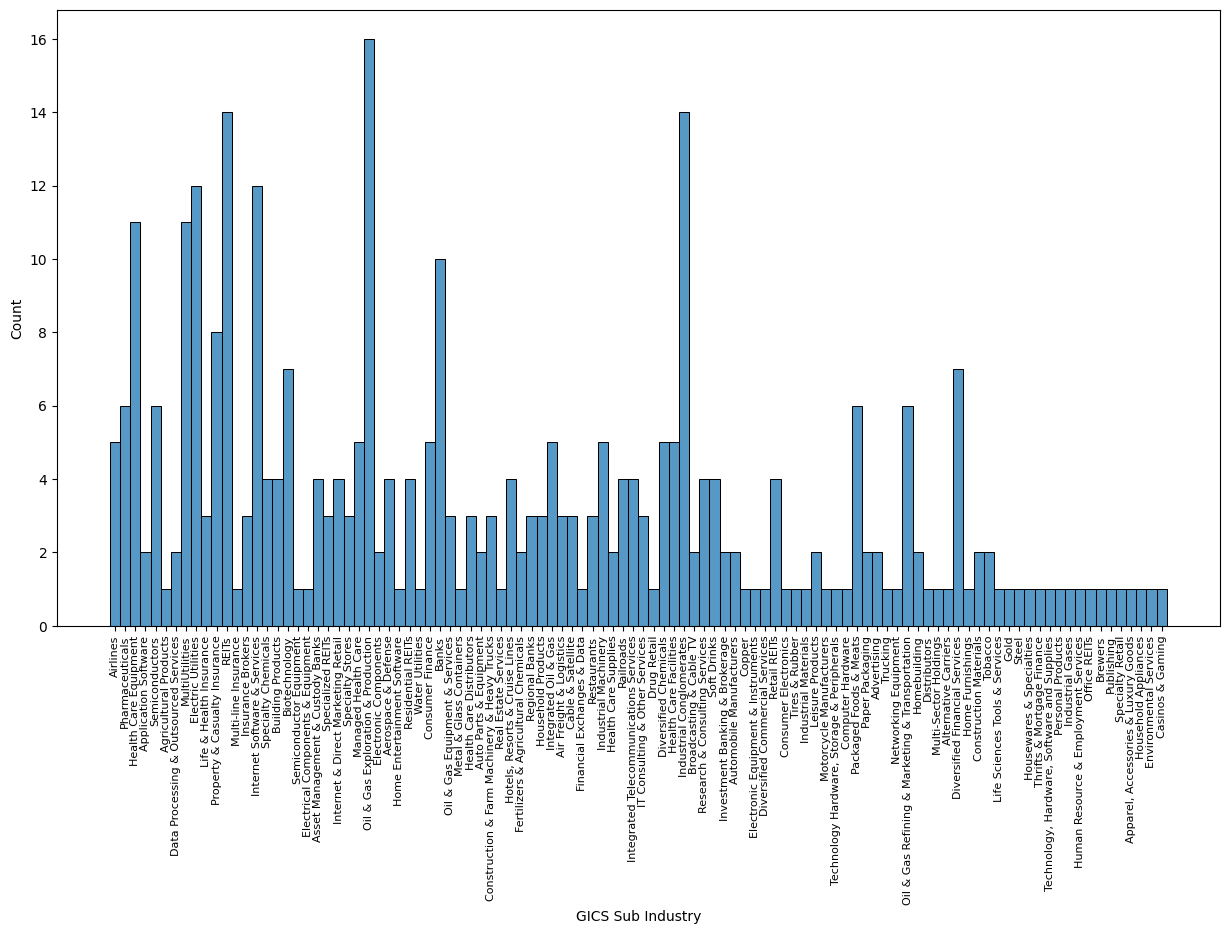

In [91]:
#analyzing GICS Sub Industry using histplot
plt.figure(figsize=(15, 8))
sns.histplot(data,x='GICS Sub Industry');
plt.xticks(rotation = 90,  fontsize=8);

### Observations 

- The highest sub industry is of 'Oil and Gas Equipments Services' 
- The second highest sub industry looks like both 'REITS' and 'Industrial Conglomerates'

<Axes: xlabel='Current Price'>

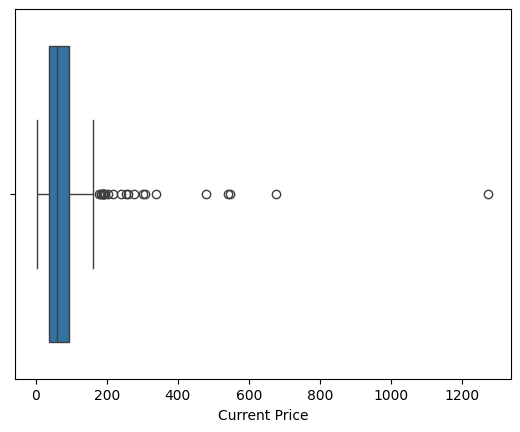

In [92]:
#analyzing Current Price column
sns.boxplot(data,x='Current Price')

### Obseervations 

1. The median is 75 with some outliers
2. These cannot be outliers as the current price is based on a number of factors can be large as well

<Axes: xlabel='Price Change'>

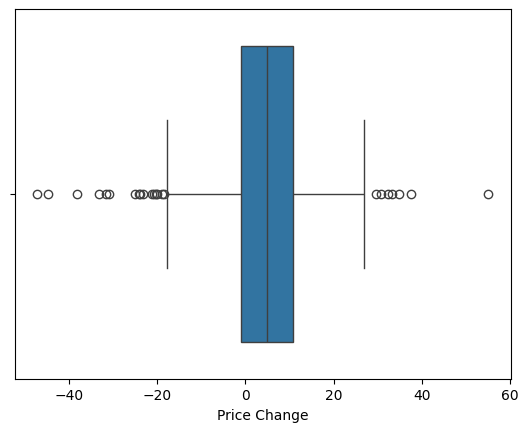

In [93]:
#analyzing the 'Price Change'
sns.boxplot(data,x='Price Change')

### Observations 

1. The median is nearly about at 0 suggesting the data is pretty balanced from Price Change perspective
2. There are outliers but there can be cases when the stock risen or fallen sharply based on various parameters

<Axes: xlabel='Volatility'>

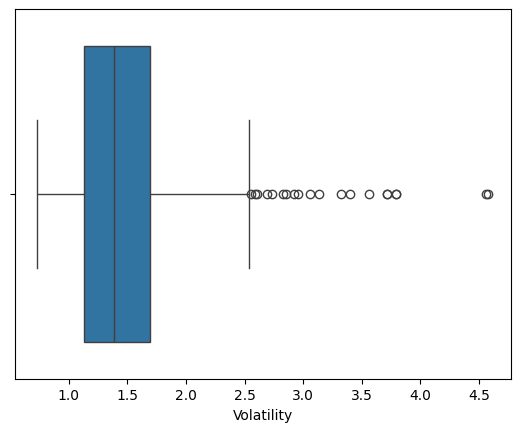

In [94]:
#analyzing Volatility' column
sns.boxplot(data,x='Volatility')

### Observations 

1. The median is around 1.5 and is right skewed with outliers
2. These could be the potential outliers, but needs further inspection

<Axes: xlabel='ROE'>

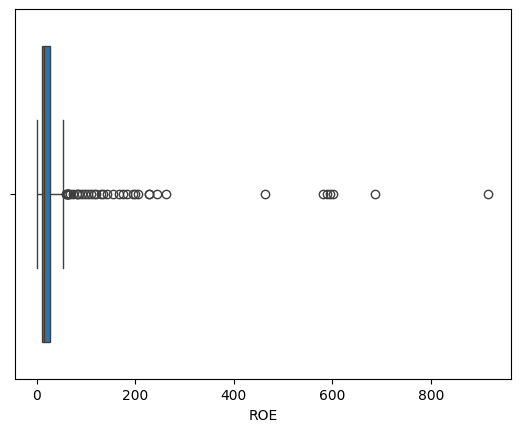

In [95]:
#analyzing the 'ROE' column
sns.boxplot(data,x='ROE')

### Observations 

1. The median is very close to 0 while there are certain values which are very large
2. Certain outliers need to be removed based on further analysis

<Axes: xlabel='Cash Ratio'>

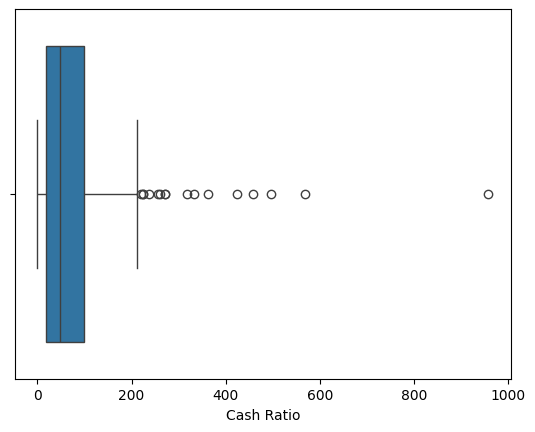

In [96]:
#analyzes of 'Cash Ratio' column
sns.boxplot(data, x= 'Cash Ratio')

### Observations 

1. The median is close to 0 and the data is right skewed 
2. There are outliers which might need to be removed 

<Axes: xlabel='Net Cash Flow'>

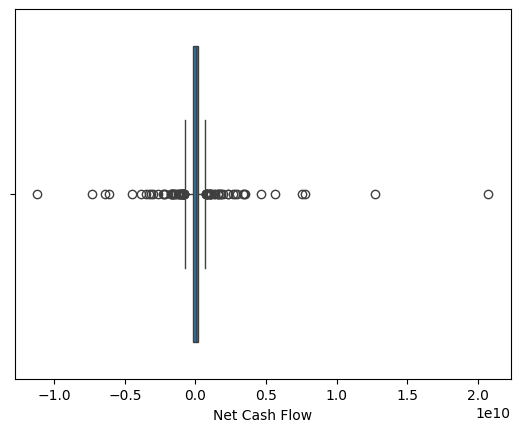

In [97]:
#analyzes of the Net Cash Flow column
sns.boxplot(data,x='Net Cash Flow')

### Observations 

1. The median is nearly 0 but does not look skewed.
2. The outliers may not have to removed since cash flow can vary company to company

<Axes: xlabel='Net Income'>

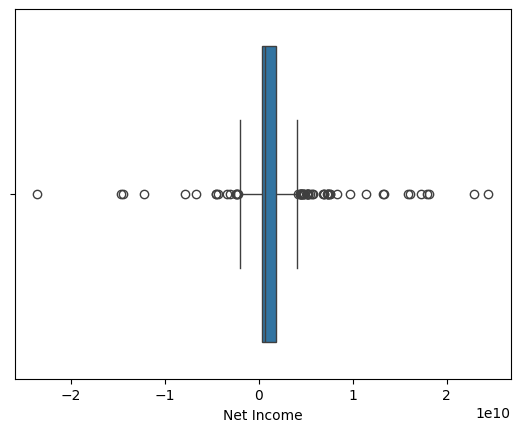

In [98]:
#analyzing the net income column
sns.boxplot(data,x='Net Income')

### Observations 

1. The median is close to zero while the third percetile is greater than the first percentile 
2. There are a bunch of outliers which cannot be removed since the income varies person to person

<Axes: xlabel='Earnings Per Share'>

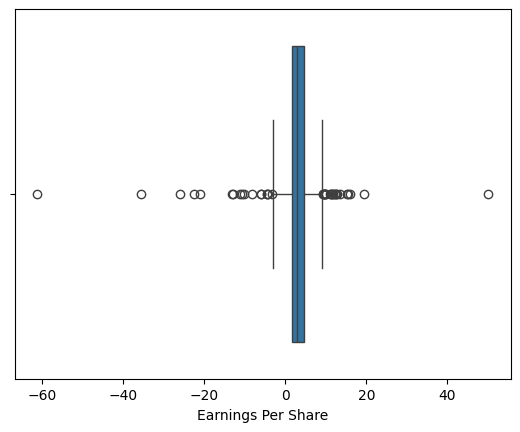

In [99]:
#analyzing the 'Earnings per Share' column
sns.boxplot(data,x='Earnings Per Share')

### Observations 

1. The median is close to 0 and does not look skewed
2. There are outliers since the earning per share can vary based on how the company is performing

<Axes: xlabel='Estimated Shares Outstanding'>

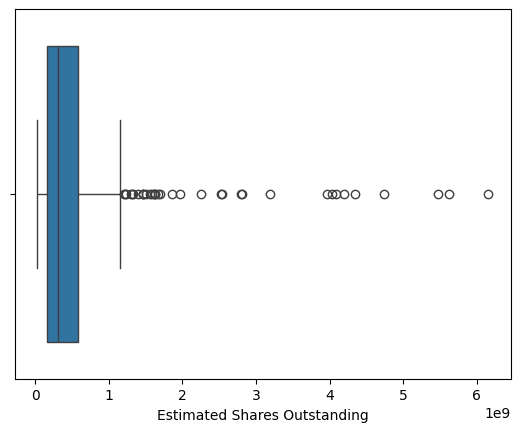

In [100]:
#analyzing the 'Estimated Shares Outstanding' column
sns.boxplot(data,x='Estimated Shares Outstanding')

### Observations 

1. The median is close to zero and the data seems to be right skewed.
2. There are outliers which might need to removed based on further analysis

<Axes: xlabel='P/E Ratio'>

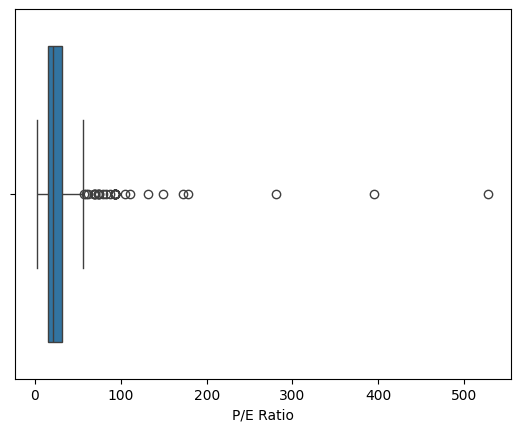

In [101]:
#analyzing the P/E Ratio column
sns.boxplot(data,x='P/E Ratio')

### Observations 

1. The data seems right skewed with median close to 0
2. There are outliers which may not required to be removed since they vary based on the buyer and seller for that particular company

<Axes: xlabel='P/B Ratio'>

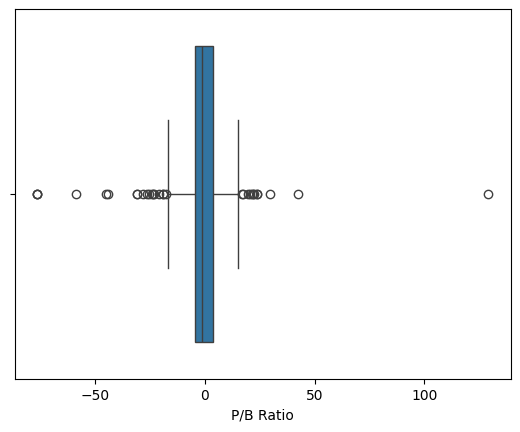

In [102]:
#analyzing the P/B Ratio column
sns.boxplot (data,x='P/B Ratio')

### Observations 

1. The median is close to 0 and data does not look skewed.
2. The outliers might require treatment based on further analysis

## Bivariate and Multivariate EDA 

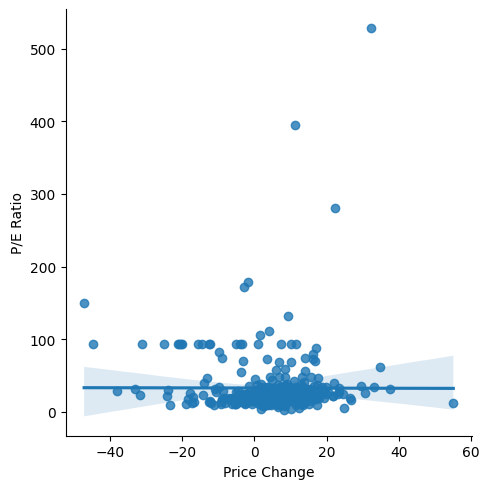

In [103]:
#analyzing price change vs p/e ratio
sns.lmplot(data,x='Price Change', y= 'P/E Ratio')

### Observations

1. The P/E ratio is pretty small for stocks which have price change from -20 to +20.
2. There  are cases when the P/E ratio is too high which either zero or very high price change, the company should undergo some scrutiny.
3. There are cases when the P/E ratio is low and price change is high, are the potential good options to invest.

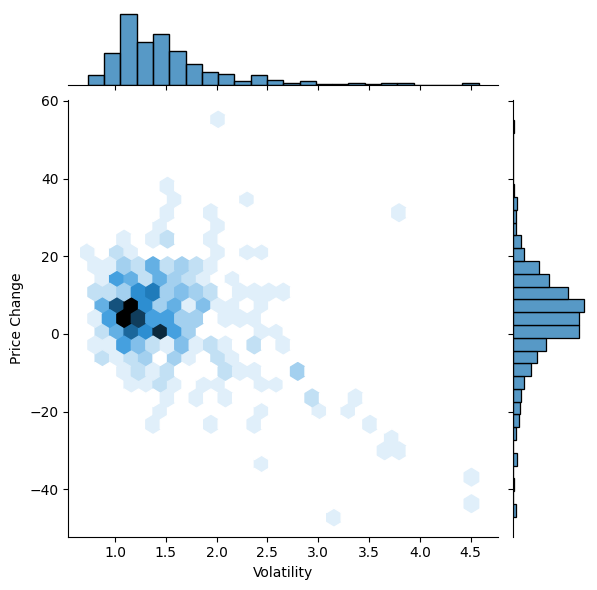

In [104]:
# analyzing the volatility and price change 
sns.jointplot(data,x='Volatility',y='Price Change',kind='hex')

### Observations

1. Usually when the price change is large, the volatility is high.
2. There are a large number of stocks having low volatility and price change is also small, which great for long term investments.
3. There are cases when the volatility is high and price change is also also high, which could be great for risk takers

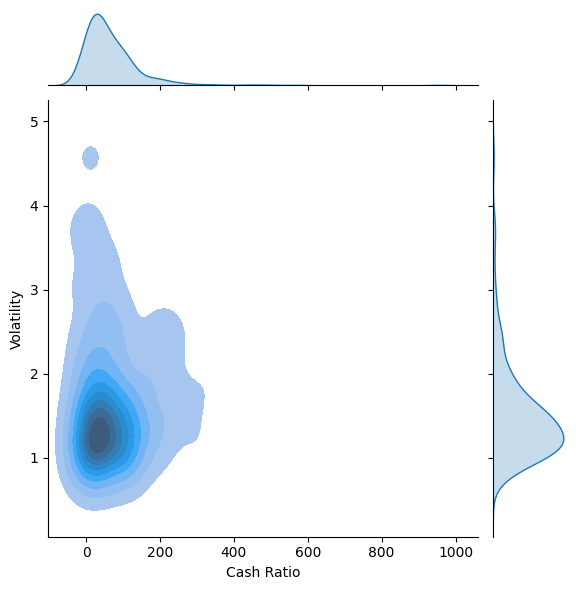

In [105]:
#analyzing the cash ratio vs volatility
sns.jointplot(data,x='Cash Ratio',y='Volatility',kind = 'kde',fill=True)

### Observations

1. Companies have low cash ratio yet high volatility should undergo some form of scrutiny.
2. Most companies low cash ratio and low volatility indicating good stocks to invest in as these are safe.

<Axes: xlabel='Net Cash Flow', ylabel='Estimated Shares Outstanding'>

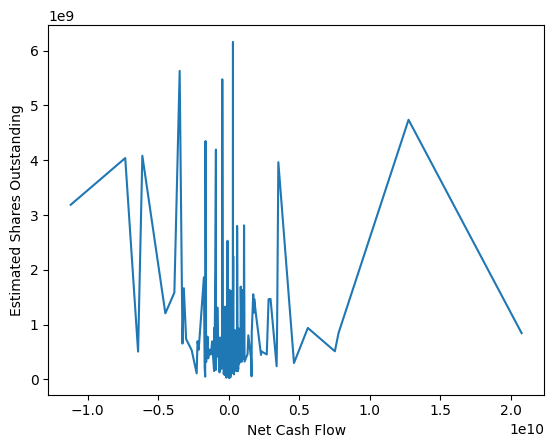

In [106]:
#analyzing net cash flow and estimated shares outstanding
sns.lineplot(data = data, x="Net Cash Flow", y="Estimated Shares Outstanding")


### Observations

1. In most of the cases, Net Cash Flow is very small or zero where the Estimated Shares Outstanding is highest. 
2. There are cases when the net cash flow is negative yet the Estimated Shares Outstanding is big enough.
3. Also there are cases when the net cash flow is positive, yet the Estimated Shares Outstanding which companies might be lacking innovation in order to have a positive cash flow.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Health Care'),
  Text(2, 0, 'Information Technology'),
  Text(3, 0, 'Consumer Staples'),
  Text(4, 0, 'Utilities'),
  Text(5, 0, 'Financials'),
  Text(6, 0, 'Real Estate'),
  Text(7, 0, 'Materials'),
  Text(8, 0, 'Consumer Discretionary'),
  Text(9, 0, 'Energy'),
  Text(10, 0, 'Telecommunications Services')])

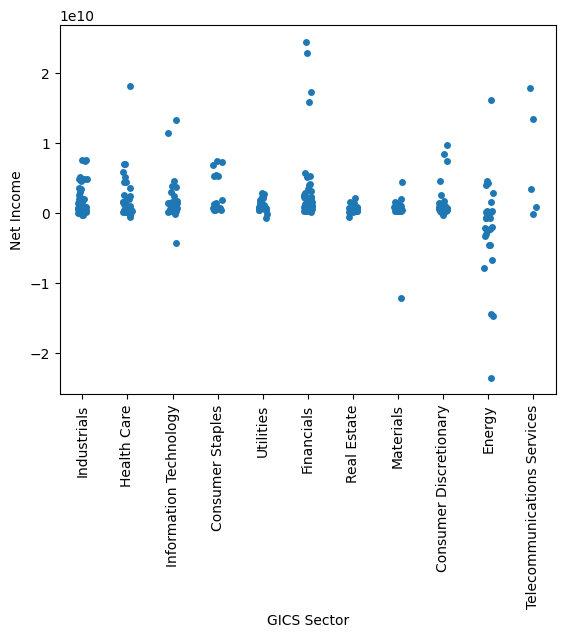

In [107]:
#analyzing the Sector vs Net Income
sns.stripplot(data,x='GICS Sector',y='Net Income',jitter=True)
plt.xticks(rotation = 90)

### Observations

1. Energy and Materials industry have negative net income.
2. Financials and Telecommunications Services have the most postive net income
3. Rest have small to zero net income 

<Axes: xlabel='Earnings Per Share', ylabel='P/B Ratio'>

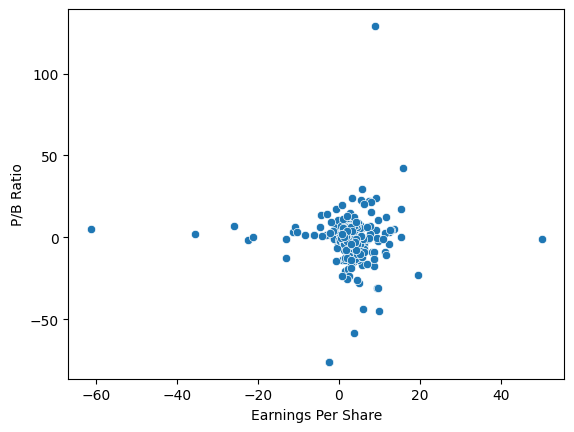

In [108]:
#analyzing the Earnings per share vs P/B Ratio
sns.scatterplot(data,x='Earnings Per Share',y='P/B Ratio')

### Observations

1. There are more stocks which have small P/B Ratio and Earnings Per Share
2. Irrespective of having high positive or negative Earnings Per Share, P/B Ratio is still close to zero

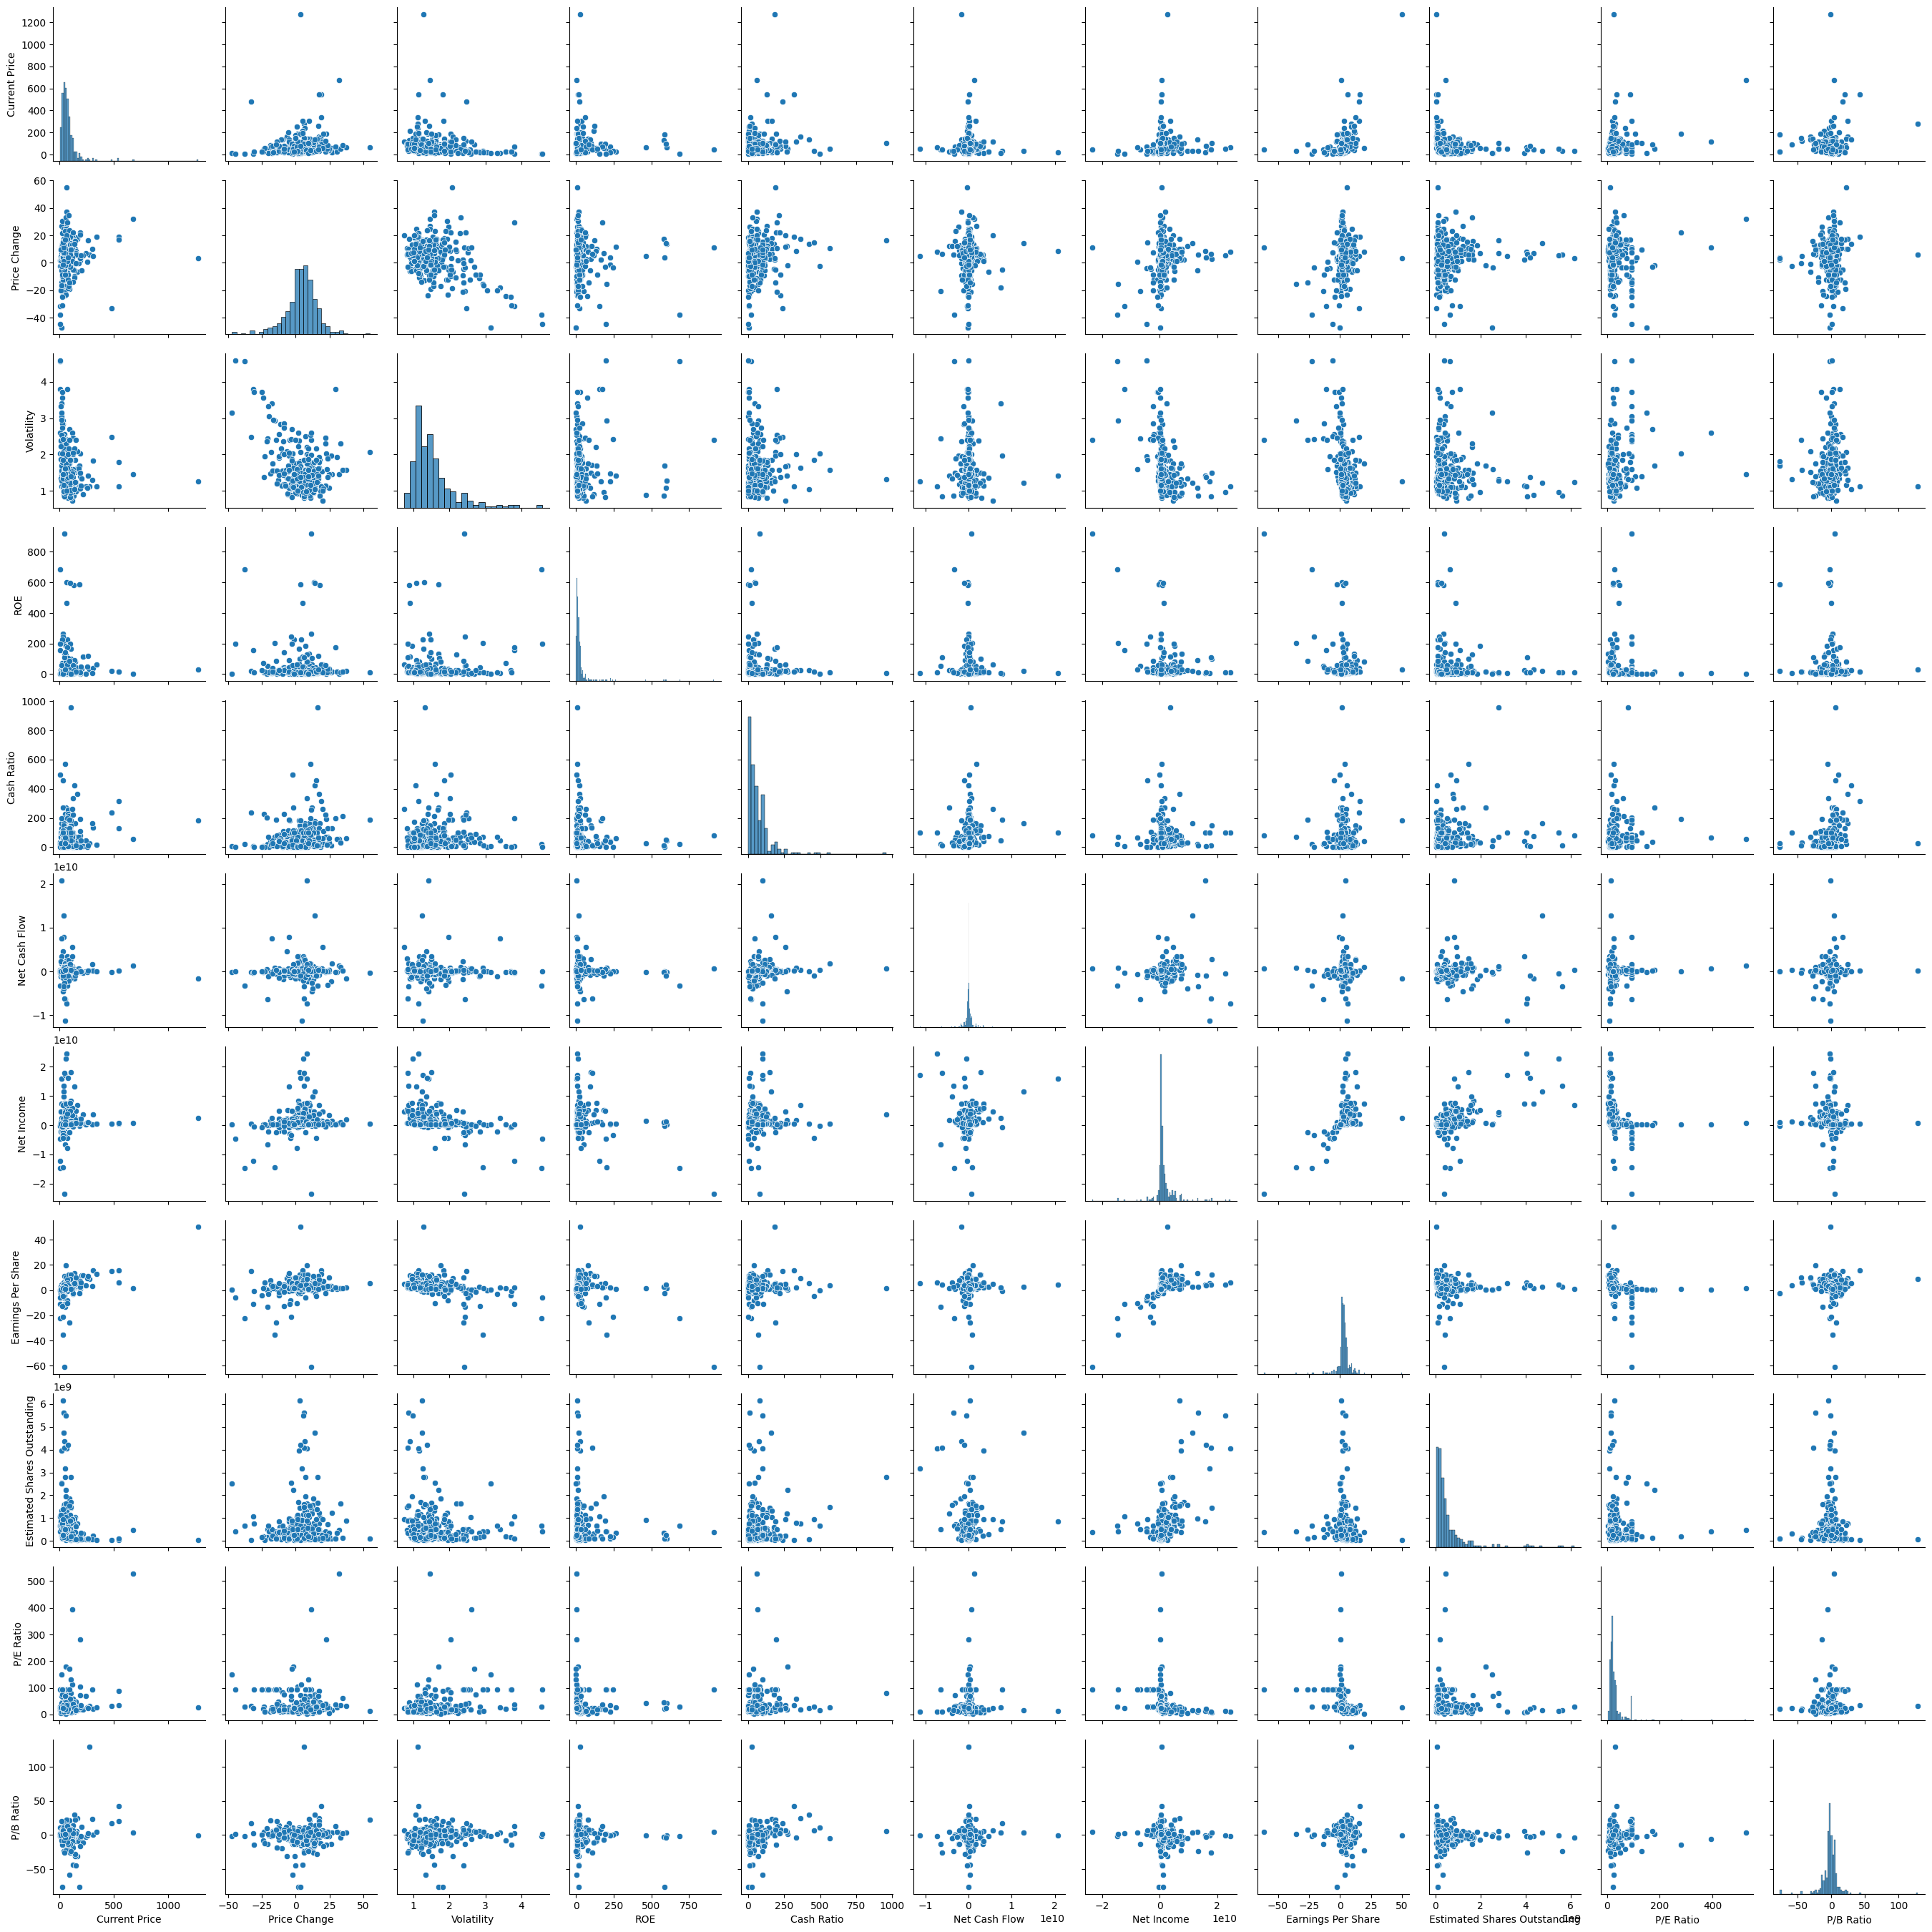

In [109]:
# pairplot of all numerical variables
sns.pairplot(data)

### Observations 

1. All the data looks normally distributed. 
2. There are certain outliers which in some cases cannot be removed 
3. In certain cases outliers need to be treated 

<Axes: >

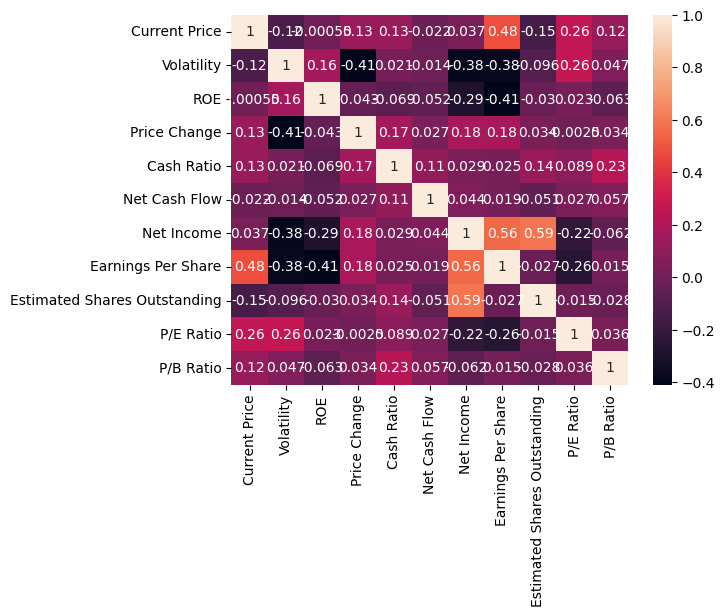

In [110]:
# heatmap for correlations 
sns.heatmap(data[['Current Price','Volatility','ROE','Price Change','Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']].corr(),annot=True)

### Observations 

1. Earnings Per Share and Net Income seem to be most related.
2. Estimated Shares Outstanding and Net Income seem to be quite related. 
3. Volatility and Price Change do not look very related.

<Axes: xlabel='Cash Ratio', ylabel='ROE'>

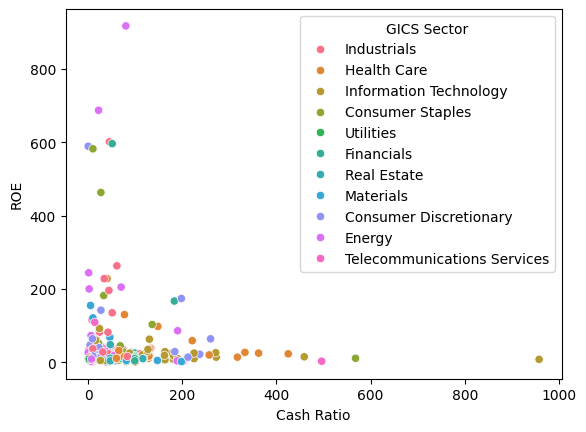

In [111]:
# analyzing the Cash Ratio vs ROE vs GICS Sector
sns.scatterplot(data,x='Cash Ratio',y='ROE',hue='GICS Sector')

### Observations

1. Energy Sector has a lower Cash Ratio with higher ROE
2. Information Technology and Consumer Staples have higher Cash Ratio with lower ROE
3. Materials and Real Estate have relatively lower Cash Ratio and a lower ROE

## Data Pre-preprocessing

In [112]:
#null values check
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Observations

 There are no null values in the dataset

In [113]:
#duplicate values check
data.duplicated().sum()

0

### Observations 

There are no duplicates in the dataset

In [114]:
#scaling of data 
from scipy.stats import zscore

#conversion to int64 columns to float64 columns for scaling purposes
data  = data.astype({col :'float64' for col in ['ROE','Cash Ratio','Net Cash Flow','Net Income']})

data_subset_scaled= data[['ROE','Cash Ratio','Net Cash Flow','Net Income','Current Price', 'Price Change','Volatility','Earnings Per Share', 'Estimated Shares Outstanding','P/E Ratio', 'P/B Ratio']].apply(zscore)
data_subset_scaled.head(10)

,ROE,Cash Ratio,Net Cash Flow,Net Income,Current Price,Price Change,Volatility,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,0.989601,-0.210698,-0.339355,1.554415,-0.393341,0.493950,0.272749,1.309399,0.107863,-0.652487,-0.506653
1,0.937737,0.077269,-0.002335,0.927628,-0.220837,0.355439,1.137045,0.056755,1.250274,-0.311769,-0.504205
2,-0.192905,-0.033488,0.454058,0.744371,-0.367195,0.602479,-0.427007,0.024831,1.098021,-0.391502,0.094941
3,-0.317379,1.218059,-0.152497,-0.219816,0.133567,0.825696,-0.284802,-0.230563,-0.091622,0.947148,0.424333
4,-0.265515,2.237018,0.133564,-0.202703,-0.260874,-0.492636,0.296470,-0.374982,1.978399,3.293307,0.199196
5,-0.307006,-0.232849,-0.125823,0.090133,-0.451251,-1.342556,-0.016049,0.032432,0.048977,-0.459427,0.660752
6,-0.099549,-0.498664,0.018187,-0.228206,1.998837,0.176091,-0.692132,0.932390,-0.603923,-0.035502,9.377562
7,-0.317379,-0.620496,0.119096,-0.218177,-0.384353,-0.158797,-0.679931,-0.026856,-0.393572,-0.360984,0.071614
8,-0.296633,-0.675874,-0.021424,0.141806,-0.230744,-0.142338,-0.774192,0.053714,-0.183672,-0.319668,-0.093530
9,-0.265515,0.320933,-0.187053,0.263986,-0.214096,-0.087667,-0.808359,0.471769,-0.173153,-0.506408,-0.011879


### Observations

1. The data is scaled using z-score so that no praticular column values have more weightage than others.

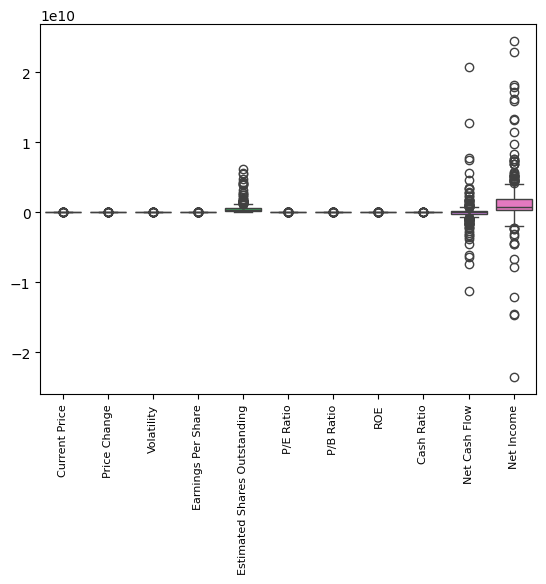

In [ ]:
#outliers removal after plotting box plots

#plotting of box plots
sns.boxplot(data=data[['Current Price', 'Price Change','Volatility','Earnings Per Share', 'Estimated Shares Outstanding','P/E Ratio','P/B Ratio','ROE','Cash Ratio','Net Cash Flow','Net Income']])
plt.xticks(rotation = 90,fontsize = 8);

### Observations

1. Removal of outliers is difficult since there can be cases when either of the features cn have abnormal values due to various scenerios. 
2. Any particular value being absolutely invalid is difficult to be justified.

## Model Building

### K-Means Clustering

In [116]:
#K-means clustering, sample call
from sklearn.cluster import KMeans

KM0 = KMeans(n_clusters=3)
KM0.fit(data_subset_scaled)
prediction = KM0.predict(data_subset_scaled)

data_prediction = pd.DataFrame(prediction,columns=['Prediction'])

data_subset_scaled_answer = pd.concat([data_subset_scaled,data_prediction],axis=1)

data_subset_scaled_answer.head(10)


,ROE,Cash Ratio,Net Cash Flow,Net Income,Current Price,Price Change,Volatility,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Prediction
0,0.989601,-0.210698,-0.339355,1.554415,-0.393341,0.493950,0.272749,1.309399,0.107863,-0.652487,-0.506653,0
1,0.937737,0.077269,-0.002335,0.927628,-0.220837,0.355439,1.137045,0.056755,1.250274,-0.311769,-0.504205,0
2,-0.192905,-0.033488,0.454058,0.744371,-0.367195,0.602479,-0.427007,0.024831,1.098021,-0.391502,0.094941,0
3,-0.317379,1.218059,-0.152497,-0.219816,0.133567,0.825696,-0.284802,-0.230563,-0.091622,0.947148,0.424333,0
4,-0.265515,2.237018,0.133564,-0.202703,-0.260874,-0.492636,0.296470,-0.374982,1.978399,3.293307,0.199196,0
5,-0.307006,-0.232849,-0.125823,0.090133,-0.451251,-1.342556,-0.016049,0.032432,0.048977,-0.459427,0.660752,0
6,-0.099549,-0.498664,0.018187,-0.228206,1.998837,0.176091,-0.692132,0.932390,-0.603923,-0.035502,9.377562,2
7,-0.317379,-0.620496,0.119096,-0.218177,-0.384353,-0.158797,-0.679931,-0.026856,-0.393572,-0.360984,0.071614,0
8,-0.296633,-0.675874,-0.021424,0.141806,-0.230744,-0.142338,-0.774192,0.053714,-0.183672,-0.319668,-0.093530,0
9,-0.265515,0.320933,-0.187053,0.263986,-0.214096,-0.087667,-0.808359,0.471769,-0.173153,-0.506408,-0.011879,0


Text(0.5, 1.0, 'Selecting optimal clusters using Elbow Method')

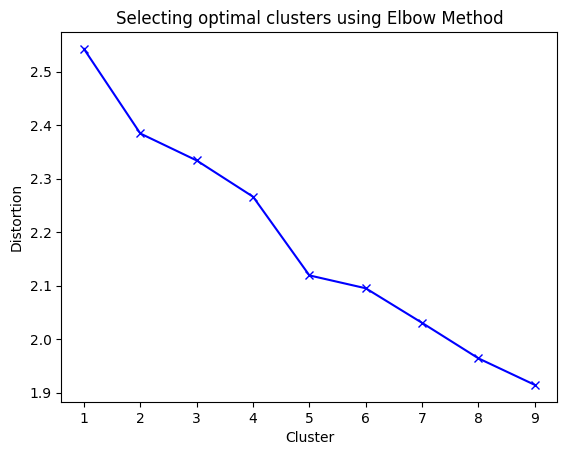

In [117]:
#performing elbow method to find the best number of clusters
from scipy.spatial.distance import cdist
cluster_range = range(1,10)
distortion = []

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(data_subset_scaled)
    prediction = model.predict(data_subset_scaled)
    distortion.append(sum(np.min(cdist(data_subset_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / data_subset_scaled.shape[0])


plt.plot(cluster_range, distortion, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('Distortion')
plt.title('Selecting optimal clusters using Elbow Method')

### Observations 

 - 5 clusters seem to be optimal since the loss gradient after the 5th cluster seems is not as large as compared to the ones before it.
 - 7 clusters also seems to be a goof fit

 Let's check both

In [118]:
#K=5
KM_5= KMeans(n_clusters = 5, random_state=1)
KM_5.fit(data_subset_scaled)
prediction = KM_5.predict(data_subset_scaled)

data_prediction_5 = pd.DataFrame(prediction,columns=['Prediction'])

data_subset_scaled_answer_5 = pd.concat([data_subset_scaled,data_prediction_5],axis=1)

data_subset_scaled_answer_5.head(10)


,ROE,Cash Ratio,Net Cash Flow,Net Income,Current Price,Price Change,Volatility,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Prediction
0,0.989601,-0.210698,-0.339355,1.554415,-0.393341,0.493950,0.272749,1.309399,0.107863,-0.652487,-0.506653,0
1,0.937737,0.077269,-0.002335,0.927628,-0.220837,0.355439,1.137045,0.056755,1.250274,-0.311769,-0.504205,0
2,-0.192905,-0.033488,0.454058,0.744371,-0.367195,0.602479,-0.427007,0.024831,1.098021,-0.391502,0.094941,0
3,-0.317379,1.218059,-0.152497,-0.219816,0.133567,0.825696,-0.284802,-0.230563,-0.091622,0.947148,0.424333,0
4,-0.265515,2.237018,0.133564,-0.202703,-0.260874,-0.492636,0.296470,-0.374982,1.978399,3.293307,0.199196,1
5,-0.307006,-0.232849,-0.125823,0.090133,-0.451251,-1.342556,-0.016049,0.032432,0.048977,-0.459427,0.660752,0
6,-0.099549,-0.498664,0.018187,-0.228206,1.998837,0.176091,-0.692132,0.932390,-0.603923,-0.035502,9.377562,4
7,-0.317379,-0.620496,0.119096,-0.218177,-0.384353,-0.158797,-0.679931,-0.026856,-0.393572,-0.360984,0.071614,0
8,-0.296633,-0.675874,-0.021424,0.141806,-0.230744,-0.142338,-0.774192,0.053714,-0.183672,-0.319668,-0.093530,0
9,-0.265515,0.320933,-0.187053,0.263986,-0.214096,-0.087667,-0.808359,0.471769,-0.173153,-0.506408,-0.011879,0


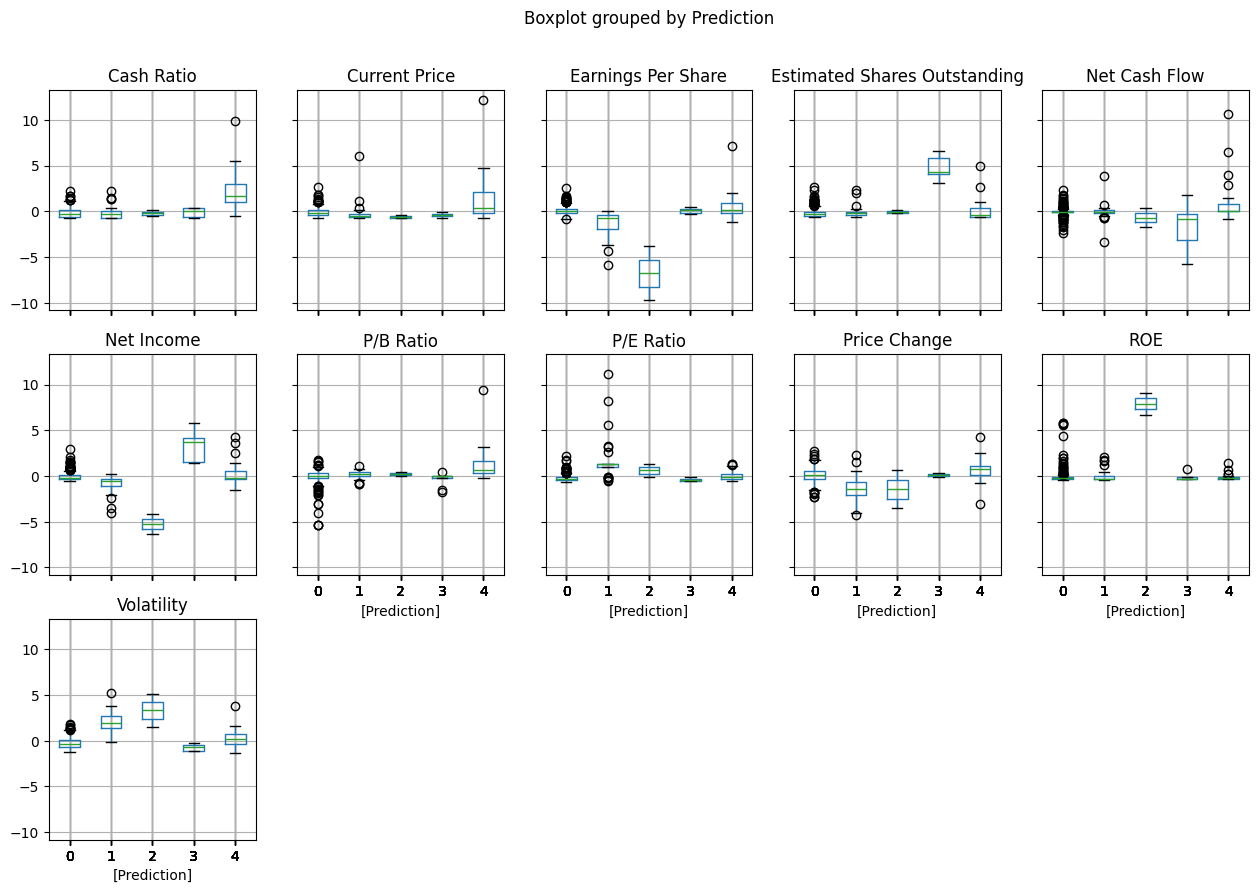

In [119]:
data_subset_scaled_answer_5.boxplot(by = 'Prediction',layout = (3,5),figsize=(15,10));

In [120]:
#K=7
KM_7= KMeans(n_clusters = 7, random_state=1)
KM_7.fit(data_subset_scaled)
prediction = KM_7.predict(data_subset_scaled)

data_prediction_7 = pd.DataFrame(prediction,columns=['Prediction'])

data_subset_scaled_answer_7 = pd.concat([data_subset_scaled,data_prediction_7],axis=1)

data_subset_scaled_answer_7.head(10)


,ROE,Cash Ratio,Net Cash Flow,Net Income,Current Price,Price Change,Volatility,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Prediction
0,0.989601,-0.210698,-0.339355,1.554415,-0.393341,0.493950,0.272749,1.309399,0.107863,-0.652487,-0.506653,6
1,0.937737,0.077269,-0.002335,0.927628,-0.220837,0.355439,1.137045,0.056755,1.250274,-0.311769,-0.504205,0
2,-0.192905,-0.033488,0.454058,0.744371,-0.367195,0.602479,-0.427007,0.024831,1.098021,-0.391502,0.094941,0
3,-0.317379,1.218059,-0.152497,-0.219816,0.133567,0.825696,-0.284802,-0.230563,-0.091622,0.947148,0.424333,0
4,-0.265515,2.237018,0.133564,-0.202703,-0.260874,-0.492636,0.296470,-0.374982,1.978399,3.293307,0.199196,4
5,-0.307006,-0.232849,-0.125823,0.090133,-0.451251,-1.342556,-0.016049,0.032432,0.048977,-0.459427,0.660752,6
6,-0.099549,-0.498664,0.018187,-0.228206,1.998837,0.176091,-0.692132,0.932390,-0.603923,-0.035502,9.377562,4
7,-0.317379,-0.620496,0.119096,-0.218177,-0.384353,-0.158797,-0.679931,-0.026856,-0.393572,-0.360984,0.071614,6
8,-0.296633,-0.675874,-0.021424,0.141806,-0.230744,-0.142338,-0.774192,0.053714,-0.183672,-0.319668,-0.093530,6
9,-0.265515,0.320933,-0.187053,0.263986,-0.214096,-0.087667,-0.808359,0.471769,-0.173153,-0.506408,-0.011879,6


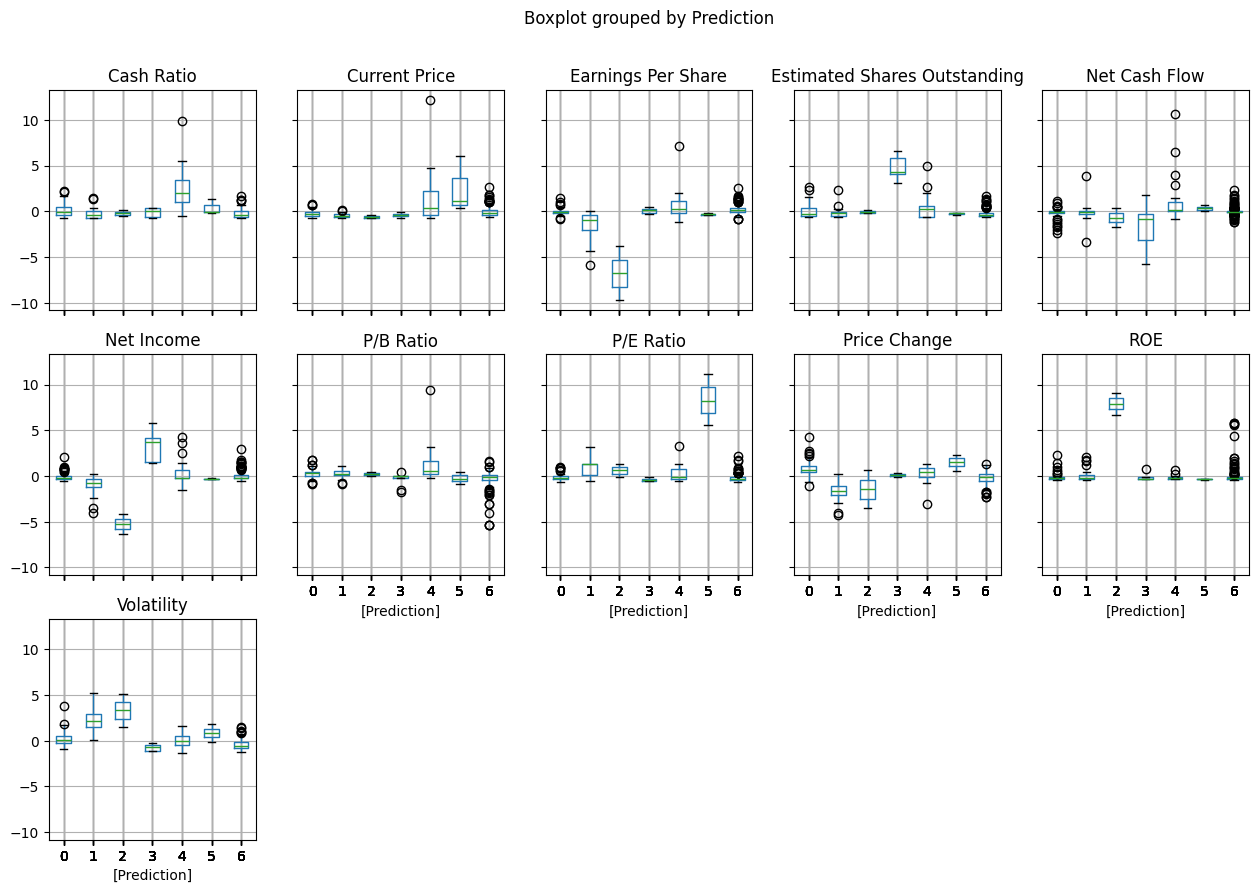

In [121]:
data_subset_scaled_answer_7.boxplot(by = 'Prediction',layout = (3,5),figsize=(15,10));

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


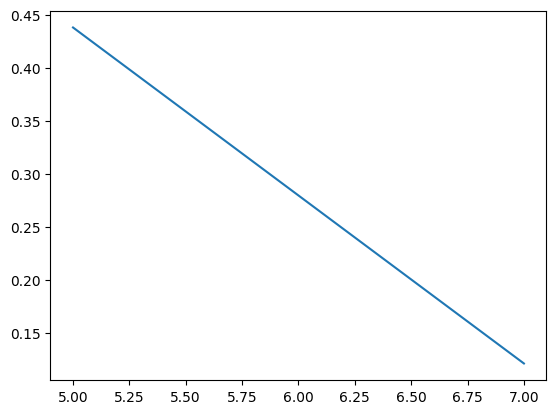

In [122]:
#silhoutte scores
from sklearn.metrics import silhouette_score

silhoutte_scores = []
cluster_range= [5,7]
score_5 = silhouette_score(data_subset_scaled,data_prediction_5)
score_7 = silhouette_score(data_subset_scaled,data_prediction_7)
silhoutte_scores.append(score_5)
silhoutte_scores.append(score_7)

plt.plot(cluster_range, silhoutte_scores);

### Observations 

- Silhoutte scores suggest that 5 clusters are a best fit for the model and would cluster greatly even on unseen data

In [123]:
#cluster profiling
cluster_profile = data_subset_scaled_answer_5.groupby("Prediction").mean()
cluster_profile["count_in_each_segment"] = (
    data_subset_scaled_answer_5.groupby("Prediction")['ROE'].count().values
)
cluster_profile

,ROE,Cash Ratio,Net Cash Flow,Net Income,Current Price,Price Change,Volatility,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
Prediction,,,,,,,,,,,,
0,-0.049495,-0.187016,-0.033797,-0.001460,-0.082974,0.091895,-0.245781,0.130661,-0.164653,-0.201693,-0.120247,275
1,0.045671,-0.095511,-0.047541,-0.923037,-0.160919,-1.331784,2.024216,-1.267390,-0.056019,1.826333,0.188131,30
2,7.908297,-0.210698,-0.693613,-5.236157,-0.575803,-1.453888,3.311126,-6.778822,-0.068025,0.635362,0.235430,2
3,-0.151413,-0.129476,-1.593107,3.394221,-0.349197,0.090783,-0.755776,0.100165,4.721654,-0.384263,-0.332412,9
4,-0.092201,2.328392,1.101902,0.334036,1.330828,0.698876,0.293458,0.614415,0.191722,0.119296,1.247700,24


### Observations 

- 275 datapoints lie in the 1st cluster
- 30 datapoints lie in the 2nd cluster
- 2 datapoints lie in the 3rd cluster
- 9 datapoints lie in the 4th cluster
- 24 datapoints lie in the 5th cluster

### Hierachical clustering

In [124]:
#plotting one of the hierarchical clustering sample

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from  scipy.spatial.distance import pdist

data_subset_scaled_HC = data_subset_scaled.copy(deep=True)

HC0 = AgglomerativeClustering (n_clusters = 5,metric="euclidean",linkage="average")
HC0.fit(data_subset_scaled_HC)

data_subset_scaled_HC["HC_Clusters"] = HC0.labels_

data_subset_scaled_HC.head(10)

,ROE,Cash Ratio,Net Cash Flow,Net Income,Current Price,Price Change,Volatility,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_Clusters
0,0.989601,-0.210698,-0.339355,1.554415,-0.393341,0.493950,0.272749,1.309399,0.107863,-0.652487,-0.506653,0
1,0.937737,0.077269,-0.002335,0.927628,-0.220837,0.355439,1.137045,0.056755,1.250274,-0.311769,-0.504205,0
2,-0.192905,-0.033488,0.454058,0.744371,-0.367195,0.602479,-0.427007,0.024831,1.098021,-0.391502,0.094941,0
3,-0.317379,1.218059,-0.152497,-0.219816,0.133567,0.825696,-0.284802,-0.230563,-0.091622,0.947148,0.424333,0
4,-0.265515,2.237018,0.133564,-0.202703,-0.260874,-0.492636,0.296470,-0.374982,1.978399,3.293307,0.199196,0
5,-0.307006,-0.232849,-0.125823,0.090133,-0.451251,-1.342556,-0.016049,0.032432,0.048977,-0.459427,0.660752,0
6,-0.099549,-0.498664,0.018187,-0.228206,1.998837,0.176091,-0.692132,0.932390,-0.603923,-0.035502,9.377562,0
7,-0.317379,-0.620496,0.119096,-0.218177,-0.384353,-0.158797,-0.679931,-0.026856,-0.393572,-0.360984,0.071614,0
8,-0.296633,-0.675874,-0.021424,0.141806,-0.230744,-0.142338,-0.774192,0.053714,-0.183672,-0.319668,-0.093530,0
9,-0.265515,0.320933,-0.187053,0.263986,-0.214096,-0.087667,-0.808359,0.471769,-0.173153,-0.506408,-0.011879,0


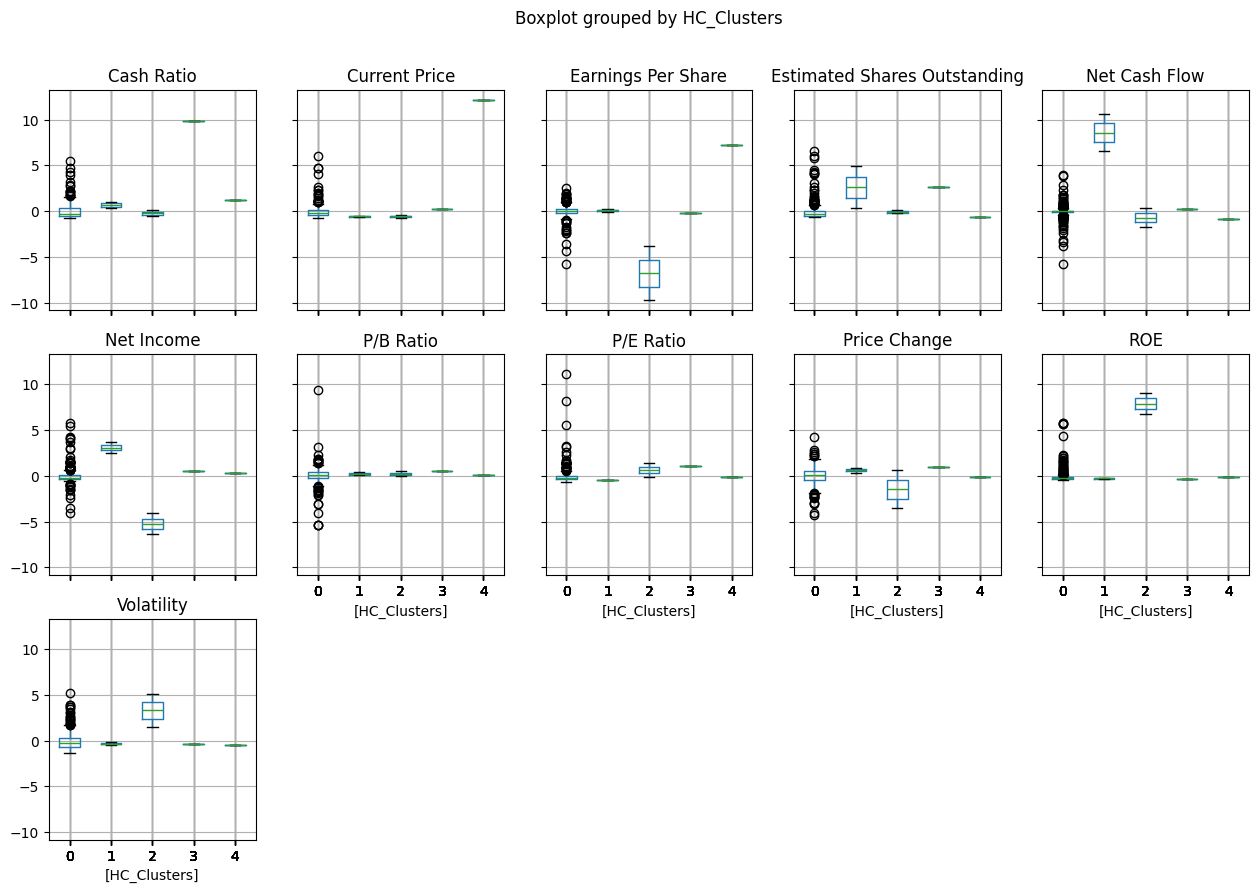

In [125]:
data_subset_scaled_HC.boxplot(by = 'HC_Clusters',layout = (3,5),figsize=(15,10));

In [126]:
#checking the cophenetic correlation

# list of distance metrics
distance_methods = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted","centroid", "ward"]

highest_corr = 0
highest_distance = ""
highest_link = ""

for distance in distance_methods:
    for link in linkage_methods:
        if link == "centroid" or link == "ward":
            distance = "euclidean"
        link_value = linkage(data_subset_scaled, metric=distance, method=link)
        corr_value, dist= cophenet(link_value, pdist(data_subset_scaled))
        
        print (f"Correlation value for {distance} and {link} is {corr_value}") 

        if highest_corr < corr_value:
            highest_corr = corr_value
            highest_distance = distance
            highest_link = link

Correlation value for euclidean and single is 0.9232271494002922
Correlation value for euclidean and complete is 0.7873280186580672
Correlation value for euclidean and average is 0.9422540609560814
Correlation value for euclidean and weighted is 0.8693784298129404
Correlation value for euclidean and centroid is 0.9314012446828155
Correlation value for euclidean and ward is 0.7101180299865353
Correlation value for chebyshev and single is 0.9062538164750717
Correlation value for chebyshev and complete is 0.598891419111242
Correlation value for chebyshev and average is 0.9338265528030499
Correlation value for chebyshev and weighted is 0.9127355892367
Correlation value for euclidean and centroid is 0.9314012446828155
Correlation value for euclidean and ward is 0.7101180299865353
Correlation value for mahalanobis and single is 0.9259195530524591
Correlation value for mahalanobis and complete is 0.7925307202850003
Correlation value for mahalanobis and average is 0.9247324030159737
Correlatio

In [127]:
print (f"Highest Cophenetic Correlation value for {highest_distance} and {highest_link} is {highest_corr}" )

Highest Cophenetic Correlation value for euclidean and average is 0.9422540609560814


### Observations 

- Highest Cophenetic Correlation is 0.9436 for euclidean and average values

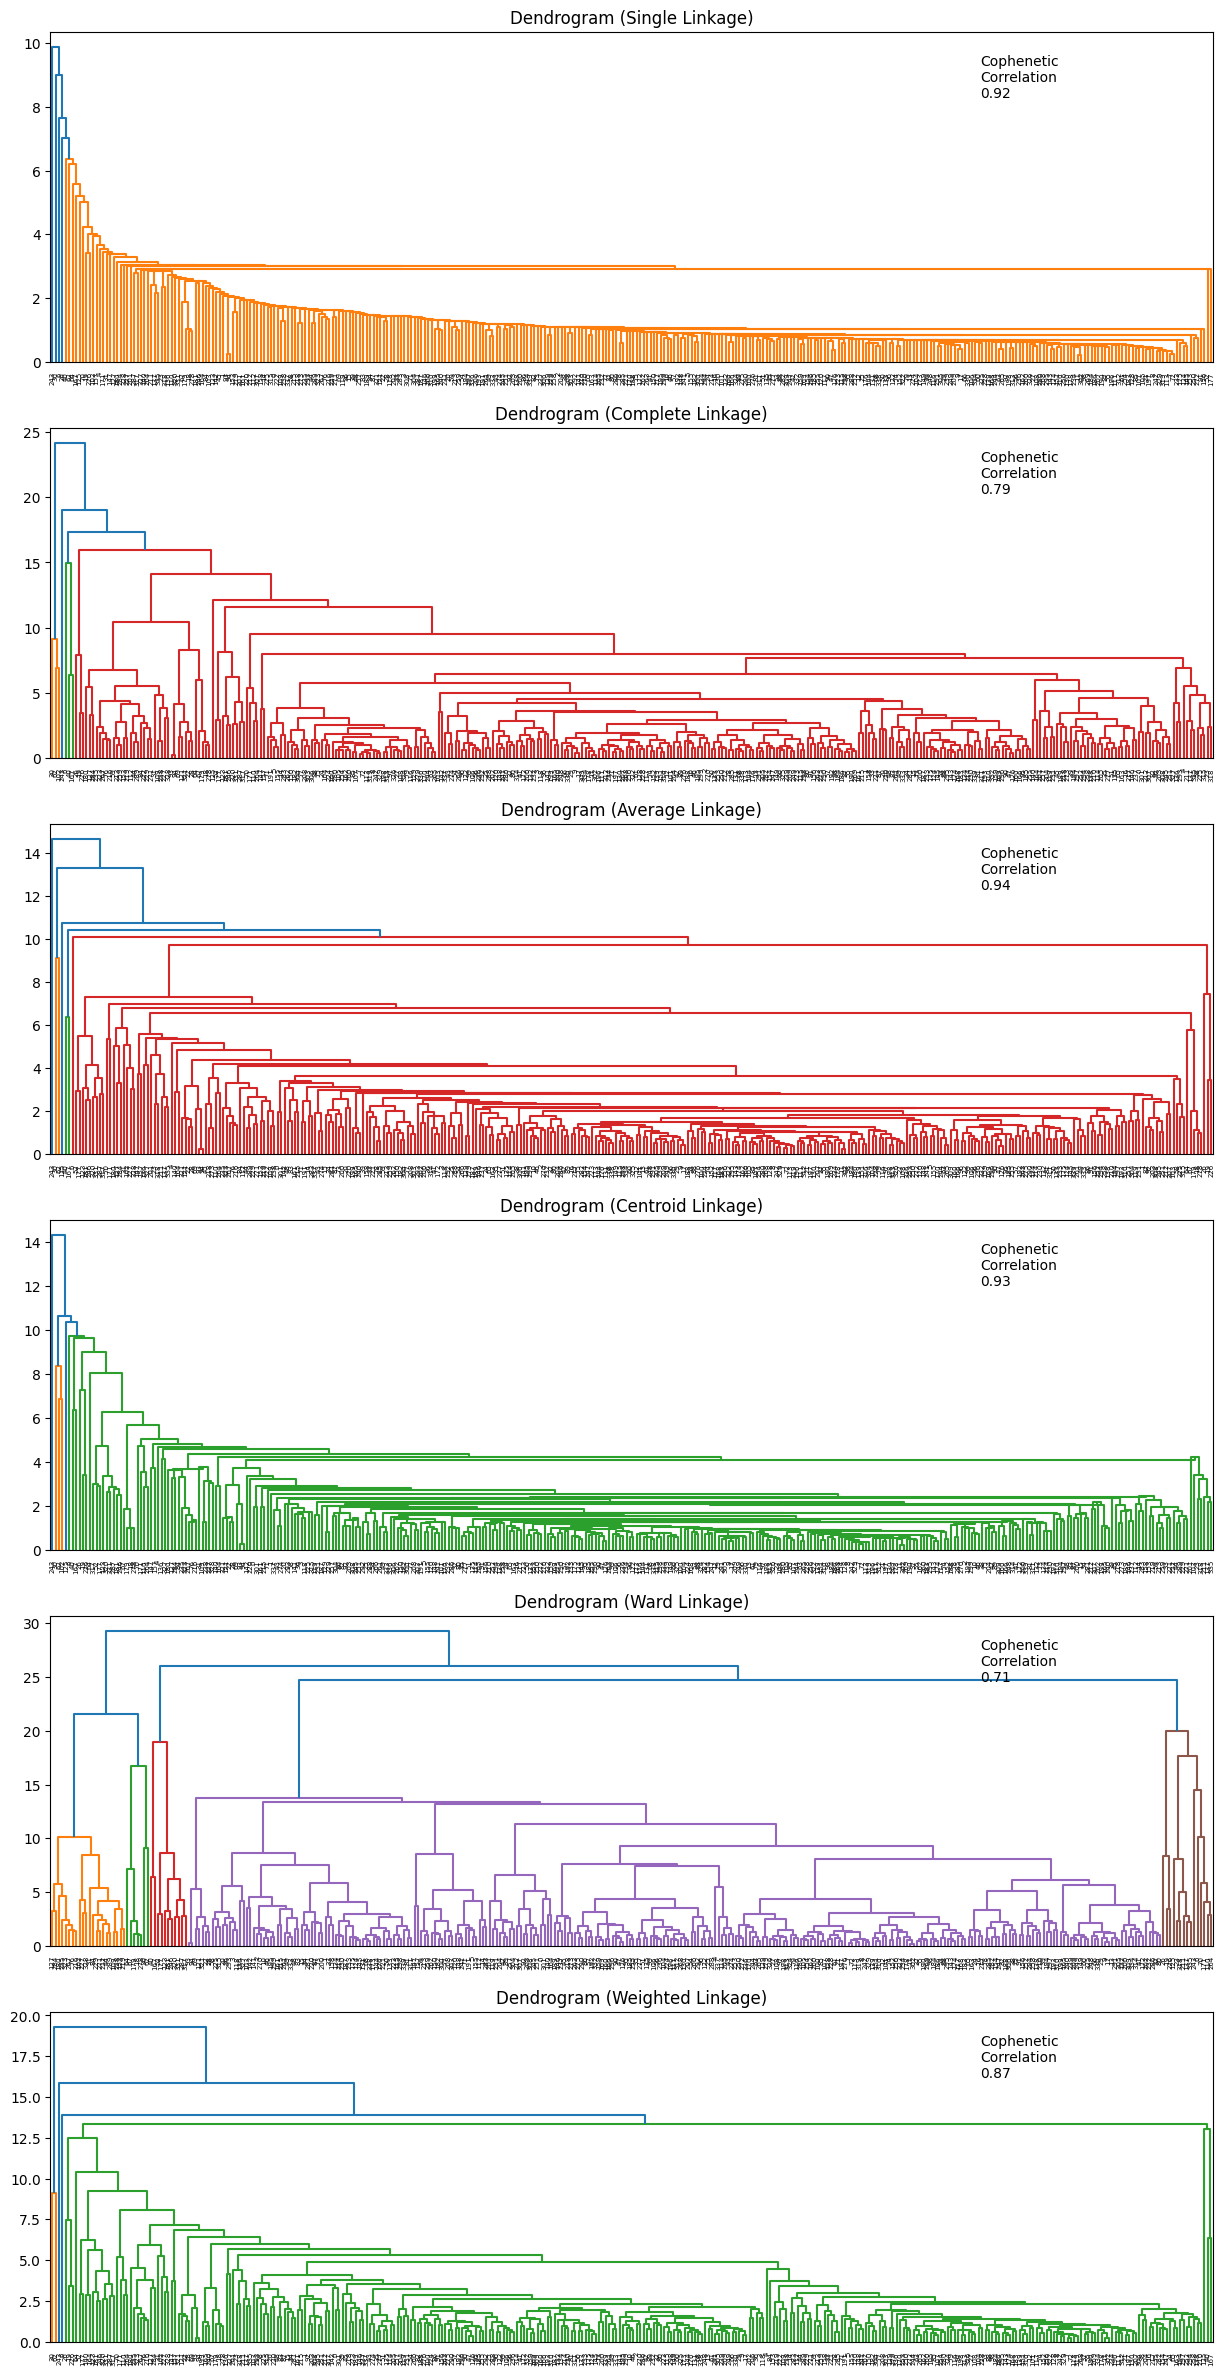

In [128]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_subset_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_subset_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

### Observations 

- Centroid Linkage and Average Linkage have the highest cophentic correlation
- 6 clusters appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [140]:
#building the final model

data_subset_scaled_HCfinal = data_subset_scaled.copy(deep=True)
HCfinal = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="average")
HCfinal.fit(data_subset_scaled_HCfinal)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [141]:
data_subset_scaled_HCfinal["HC_Clusters"] = HCfinal.labels_

### Cluster Profiling

In [ ]:
cluster_profile = data_subset_scaled_HCfinal.groupby("HC_Clusters").mean()

cluster_profile["count_in_each_segments"] = (
    data_subset_scaled_HCfinal.groupby("HC_Clusters")["ROE"].count().values
)

cluster_profile

,ROE,Cash Ratio,Net Cash Flow,Net Income,Current Price,Price Change,Volatility,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,-0.044196,-0.034585,-0.045657,0.011105,-0.036510,0.001796,-0.013386,0.016511,-0.019563,-0.003858,-0.032745,333
1,-0.281074,0.669815,8.592722,3.090627,-0.564007,0.597207,-0.344579,0.078798,2.622293,-0.428216,0.231367,2
2,7.908297,-0.210698,-0.693613,-5.236157,-0.575803,-1.453888,3.311126,-6.778822,-0.068025,0.635362,0.235430,2
3,-0.327752,9.834905,0.276029,0.552725,0.243055,1.013134,-0.347539,-0.222962,2.632871,1.067680,0.545140,1
4,-0.109922,1.262362,-0.888563,0.268653,12.195670,-0.074042,-0.435986,7.192572,-0.622886,-0.161672,0.047742,1
5,-0.099549,-0.498664,0.018187,-0.228206,1.998837,0.176091,-0.692132,0.932390,-0.603923,-0.035502,9.377562,1


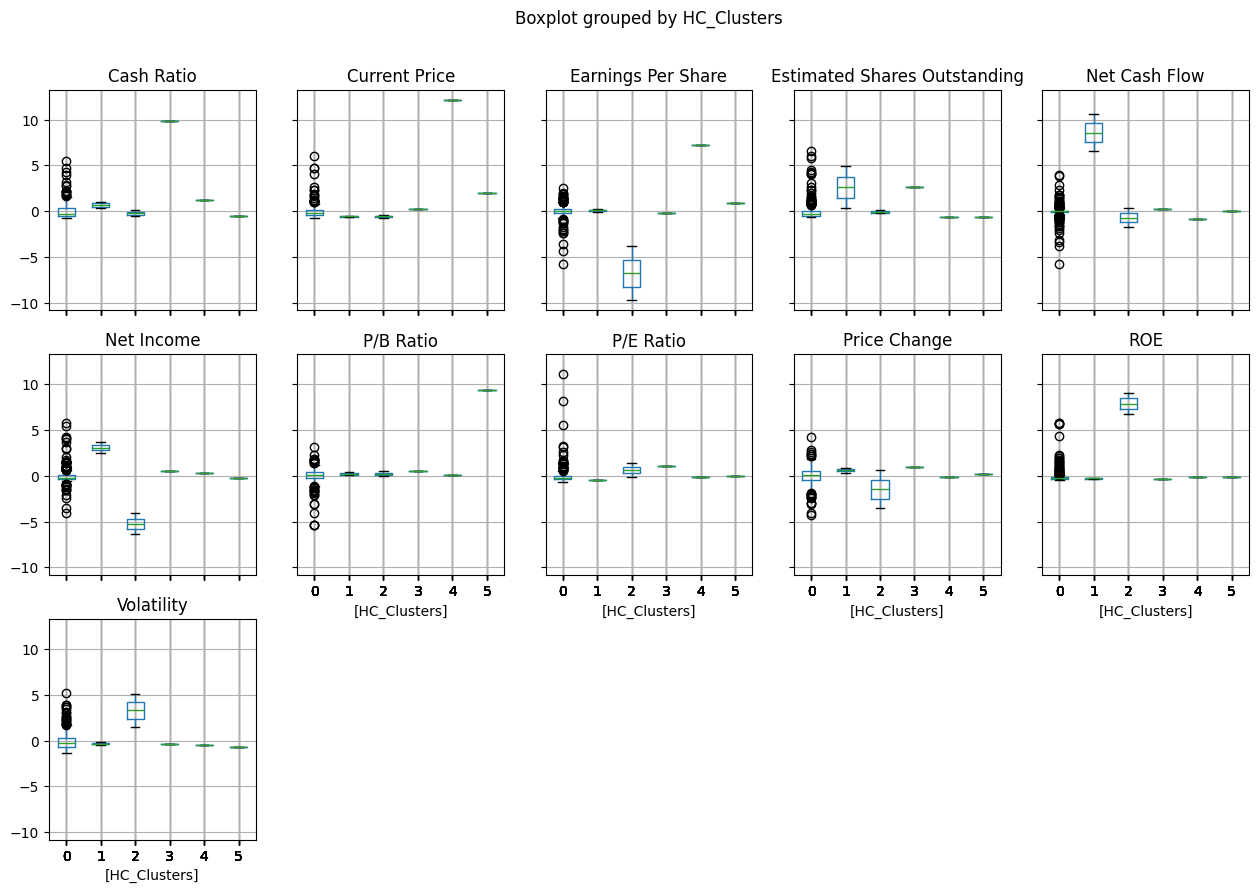

In [143]:
data_subset_scaled_HCfinal.boxplot(by = 'HC_Clusters',layout = (3,5),figsize=(15,10));

## Creating final model

In [148]:
#comparison of KMeans vs Hierarchical Clustering

#KMeans Clustering
cluster_profile_kmeans = data_subset_scaled_answer_5.groupby("Prediction").mean()
cluster_profile_kmeans["count_in_each_segment"] = (
    data_subset_scaled_answer_5.groupby("Prediction")['ROE'].count().values
)

total_data_answer = cluster_profile_kmeans.drop(columns=['count_in_each_segment'],axis =1)
total_data_answer['count_in_each_segment_kmeans'] = cluster_profile_kmeans['count_in_each_segment']

#Hierarchical Clustering
cluster_profile_hierarchical = data_subset_scaled_HCfinal.groupby("HC_Clusters").mean()
cluster_profile_hierarchical["count_in_each_segments"] = (
    data_subset_scaled_HCfinal.groupby("HC_Clusters")["ROE"].count().values
)

total_data_answer['count_in_each_segment_hierarchical'] = cluster_profile_hierarchical['count_in_each_segments'] 
total_data_answer

,ROE,Cash Ratio,Net Cash Flow,Net Income,Current Price,Price Change,Volatility,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment_kmeans,count_in_each_segment_hierarchical
Prediction,,,,,,,,,,,,,
0,-0.049495,-0.187016,-0.033797,-0.001460,-0.082974,0.091895,-0.245781,0.130661,-0.164653,-0.201693,-0.120247,275,333
1,0.045671,-0.095511,-0.047541,-0.923037,-0.160919,-1.331784,2.024216,-1.267390,-0.056019,1.826333,0.188131,30,2
2,7.908297,-0.210698,-0.693613,-5.236157,-0.575803,-1.453888,3.311126,-6.778822,-0.068025,0.635362,0.235430,2,2
3,-0.151413,-0.129476,-1.593107,3.394221,-0.349197,0.090783,-0.755776,0.100165,4.721654,-0.384263,-0.332412,9,1
4,-0.092201,2.328392,1.101902,0.334036,1.330828,0.698876,0.293458,0.614415,0.191722,0.119296,1.247700,24,1


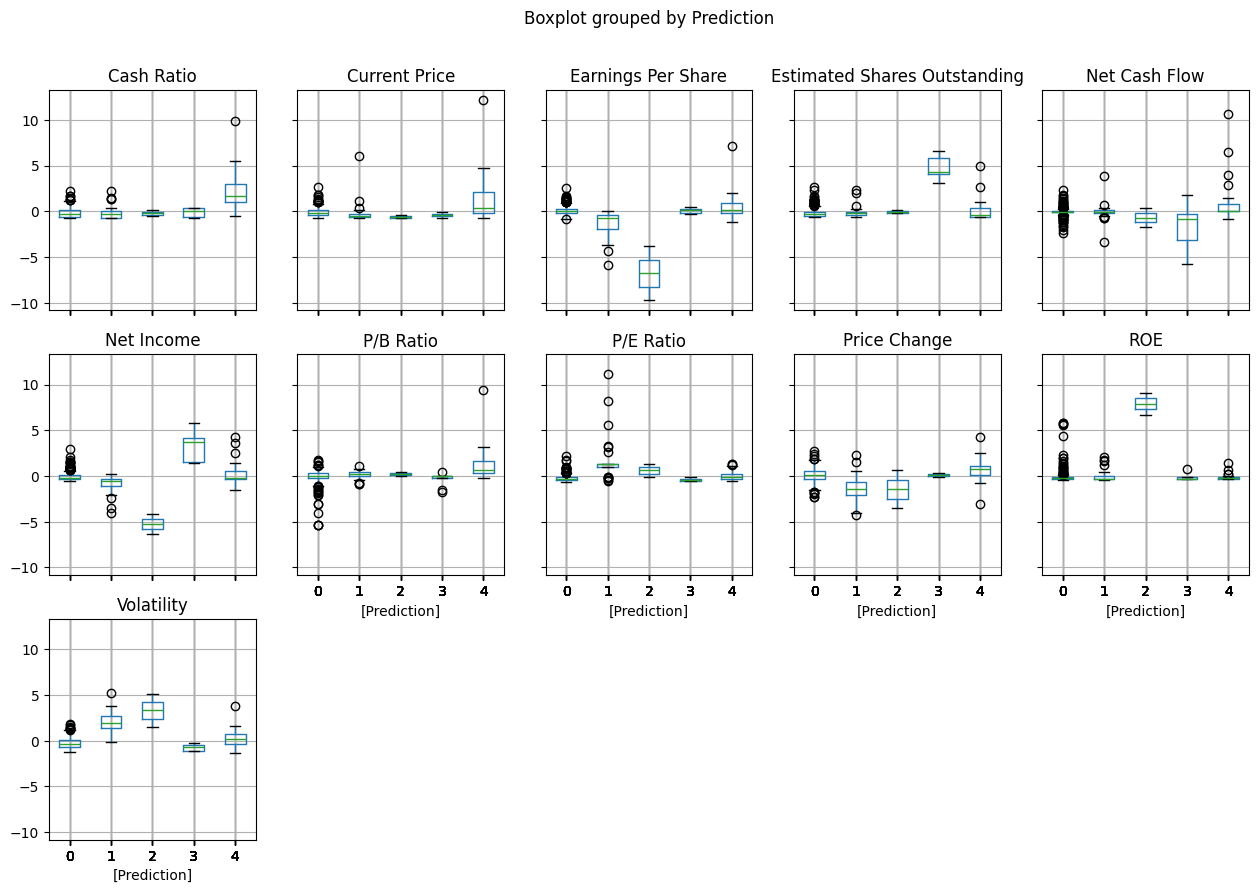

In [176]:
data_subset_scaled_answer_5.boxplot(by = 'Prediction',layout = (3,5),figsize=(15,10));

### Insights

- Cluster 0 - The median is close to 0 but consists of most of the extreme numbers which can be seen as outliers
- Cluster 1  - The median is less than 0 and values in most cases are less than 0
- Cluster 2 - There are lot of mixed values here, with some having median greater than zero while some having median less than zero
- Cluster 3 - There are lot of mixed values here, with some having median greater than zero while some are still less than zero. 
- Cluster 4 - Mostly the median is close to zero with a lot less outliers.

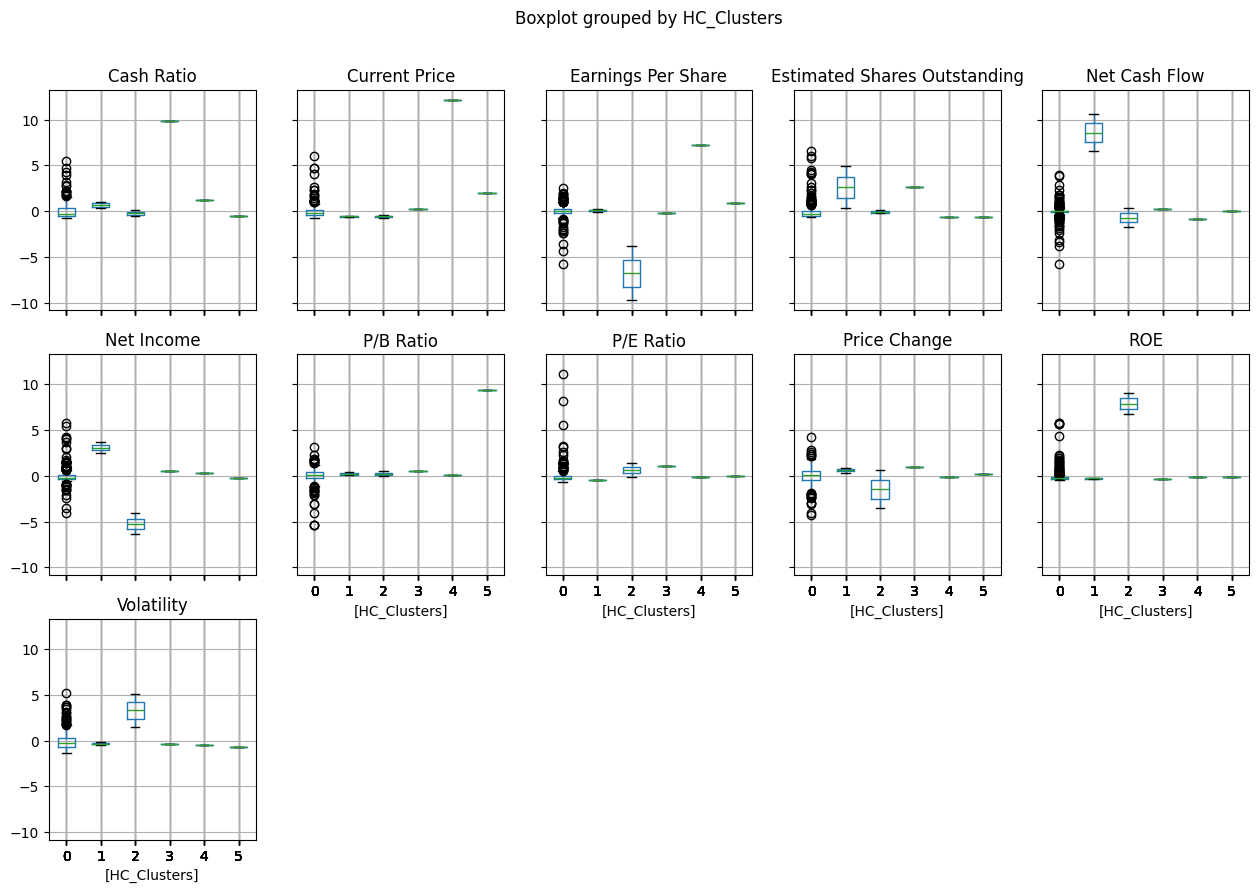

In [178]:
data_subset_scaled_HCfinal.boxplot(by = 'HC_Clusters',layout = (3,5),figsize=(15,10));

### Insights 

- Cluster 0 - Mostly consists of extreme values which can be seen as outliers 
- Cluster 1 - 'Cash Ratio', 'Estimated Shares Outstanding', 'Net Cash Flow' have median greater than zero but rest close to zero
- Cluster 2 - 'Earnings Per Share' ,'Net Cash Flow', 'Net Income' have median less than zero, 'ROE','Volatility','P/E Ratio' have median greater than zero
- Cluster 3 - 'Cash Ratio','Estimated Shares Outstanding','P/E Ratio' have positive  median 
- Cluster 4 - 'Cash Ratio' ,'Current Price', 'Earnings per Share' have positive median
- Cluster 5 - 'Current Price' ,'P/B Ratio' have positive median and rest are close to zero

## Final Insights and Business Recommendations

- KMeans is an ideal clustering algorithm with 5 clusters for this particular use case
- Investing in the stock with have median close to zero is the safest option
- For high risk options, can go ahead with slightly higher median options
- Should have a target stock base of mixed stocks like mutual funds based on the target customers and the apetite of taking risks